# <center> Machine Learning Project </center>


### Contents

* [Part A- Data Exploration](#partA)
    * [Correlation between features](#cbf)
* [Part B- preprocessing](#partB)
    * [Removing outliers](#ro)
    * [Normalization](#n)
    * [Ohe-Hot encoder](#ohe)
    * [PCA](#pca)
* [Part C- Models](#partC)
     * [KNN](#knn)
     * [Logistic Reggression](#lr)
     * [ANN](#ann)
     * [Random Forest](#rf) 
* [Part D- Evaluation](#partD)
    * [Confusion matrix](#cm)
    * [ROC curve](#roc)
    * [OverFitting](#of)
* [Part E- Prediction](#partE) 

In [136]:
# importing

import datetime
#setting start time for checking the running duration 
start_time = datetime.datetime.now()

import numpy as np
import pandas as pd
from scipy import interp, stats
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import pylab

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import  KFold, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor

### loading the datasets

In [137]:
#submission_example= pd.read_csv("/submission_example.csv")
test = pd.read_csv("C:/Data/ML_2021/test_without_target.csv")
train = pd.read_csv("C:/Data/ML_2021/train.csv")

#drop the index column in the test 

test = test.drop('Unnamed: 0',axis=1)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,label
0,1.0,a,-1d,0.828866,216.0,4.846091,K,50.0,0,161.714226,...,n,2.0,414.0,0.0,S,2.191401,a8,NaN,15.921017,1
1,8.0,a,-1d,8.981168,46.0,7.324911,A,270.0,0,328.559851,...,n,3.0,63.0,0.0,M,3.811778,a8,NaN,47.567140,0
2,1.0,a,-1d,1.458061,3304.0,7.548887,D,200.0,1,298.775554,...,n,1.0,218.0,0.0,M,4.284457,a4,NaN,10.522228,0
3,1.0,b,-1d,2.753682,212.0,8.200746,E,170.0,0,285.342907,...,y,2.0,NaN,0.0,D,4.680751,a7,NaN,21.185050,0
4,1.0,unknown,-1d,4.496872,1050.0,5.071094,B,260.0,1,328.464688,...,n,3.0,293.0,0.0,S,2.740114,a5,NaN,47.491164,0


In [138]:
train.shape

(21931, 22)

# Part A - data exploration
<a class="anchor" id="partA"></a>

In [139]:
#present some stats about the features by using describe() func

headers = train.columns.tolist() #columns --> to list
features = headers[1:-1] ## slicing for taking  the features only
train[features].describe() ## using pandas describe function 

,3,4,5,7,8,9,10,11,13,14,15,17,20
count,21826.000000,21906.000000,21871.000000,21911.000000,21931.000000,21892.000000,21828.000000,21860.000000,21891.000000,17946.000000,21832.000000,21830.000000,21930.000000
mean,4.204116,1383.256596,6.589936,157.450596,0.542429,256.617674,0.608164,268.845882,2.063816,276.022010,0.017314,3.647972,26.278887
std,3.752786,3030.087625,0.921664,83.121658,0.498208,71.635412,1.893069,183.952200,0.784205,274.575423,0.130442,0.746277,20.111219
min,-11.138786,-8019.000000,3.776680,10.000000,0.000000,-1.892158,0.000000,0.003898,0.000000,0.000000,0.000000,1.939095,-54.438941
25%,1.605409,80.000000,5.901285,80.000000,0.000000,209.751981,0.000000,119.317515,2.000000,108.000000,0.000000,3.036520,12.679984
50%,4.190917,470.000000,6.517118,160.000000,1.000000,277.786998,0.000000,242.093814,2.000000,191.000000,0.000000,3.535312,26.477637
75%,6.811247,1472.750000,7.246177,210.000000,1.000000,306.584649,0.000000,388.855035,3.000000,342.000000,0.000000,4.150667,39.945262
max,17.647593,102127.000000,10.303540,310.000000,1.000000,347.191571,41.000000,1081.031042,3.000000,4918.000000,1.000000,7.141043,102.590418


### categorial data

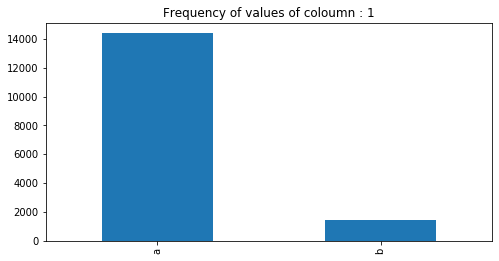

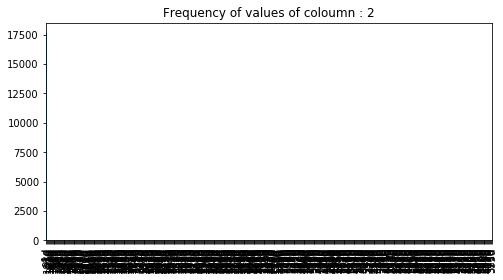

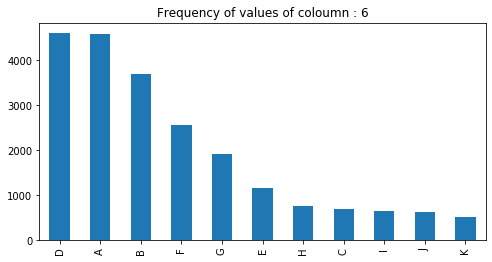

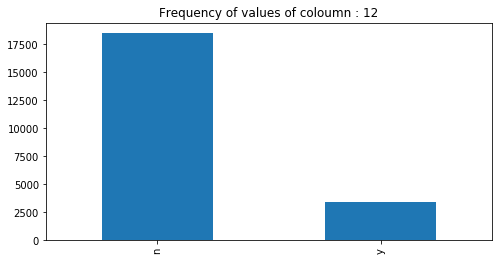

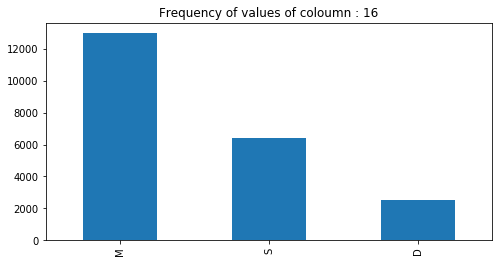

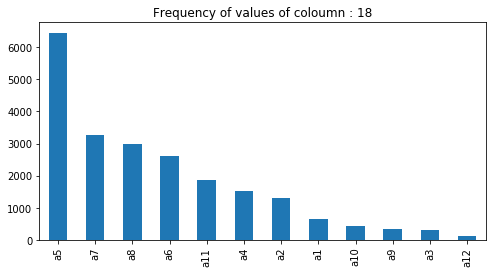

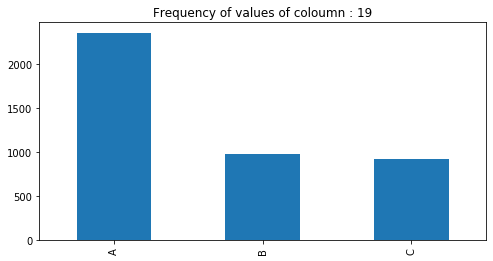

In [140]:
# By using train.dtypes we can understand which columns had "object" type.
# We will use categorial plotting.
# We need to handling NULL (with pd.dropna()) and "Unknown" (column 1).
# We will use df.to_frame() for covnerting the series to a DataFrame.

def plot_categorial(data):              # ploting catregorial data 
    columns = data.columns.tolist()    
    for col in columns:

        data_col=data[col].dropna().sort_values(ascending = True).to_frame()
        if data[col].dtypes == object:
            data_col= data[(data[col] != "unknown")]
            
            
            plt.figure(figsize= (8,4))
            plt.title("Frequency of values of coloumn : %s"%col)
            data_col[col].value_counts().plot( kind='bar')


plot_categorial(train)

boxplot of col 0


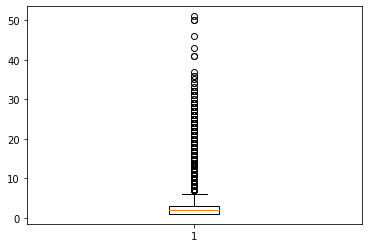

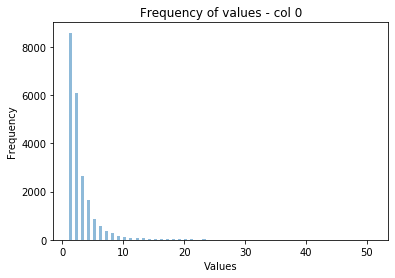

QQ-plot for col values


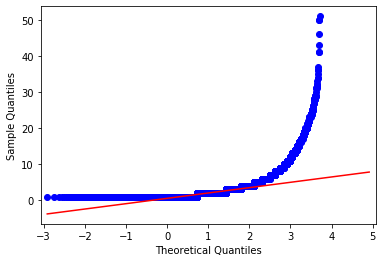

boxplot of col 3


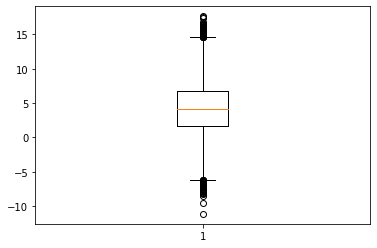

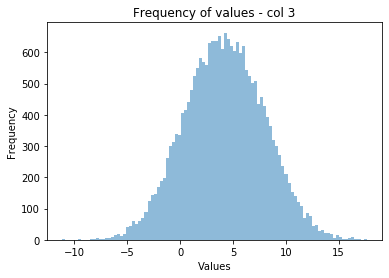

QQ-plot for col values


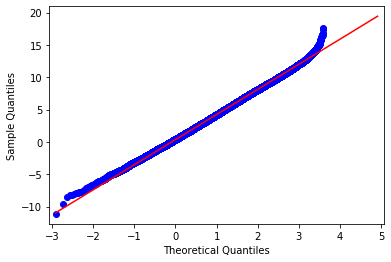

boxplot of col 4


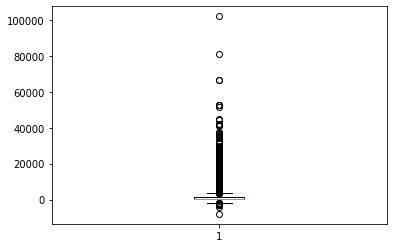

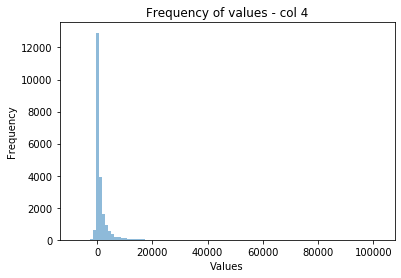

QQ-plot for col values


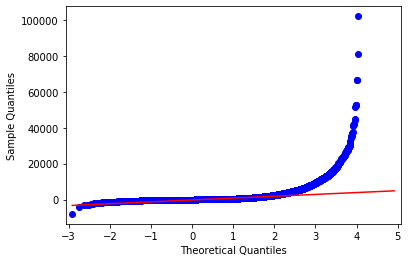

boxplot of col 5


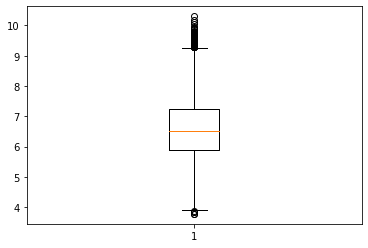

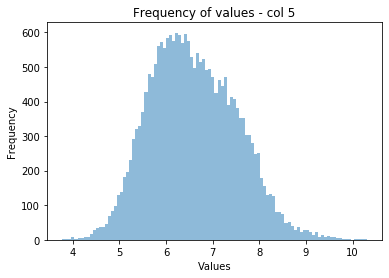

QQ-plot for col values


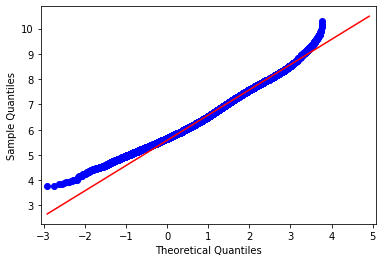

boxplot of col 7


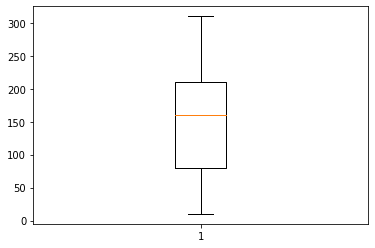

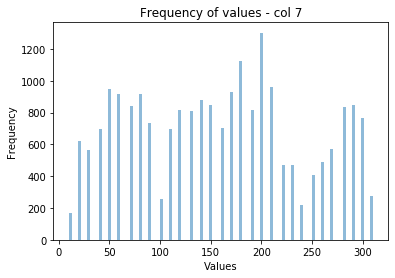

QQ-plot for col values


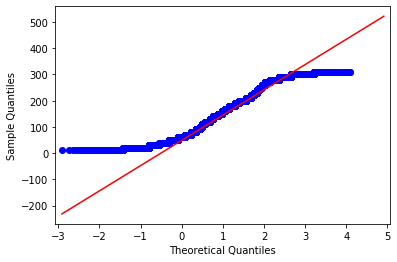

boxplot of col 8


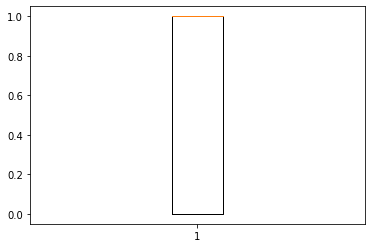

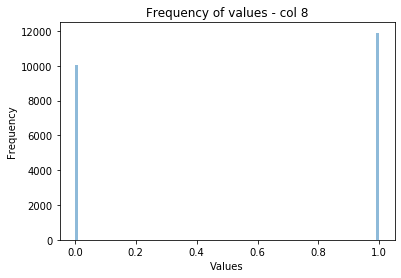

QQ-plot for col values


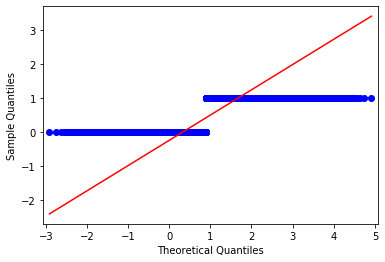

boxplot of col 9


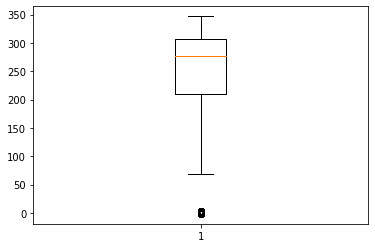

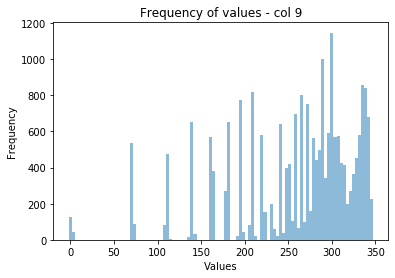

QQ-plot for col values


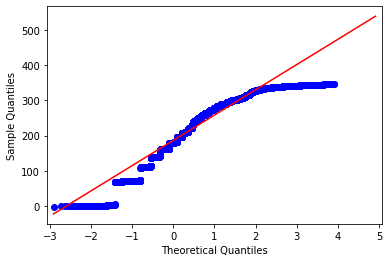

boxplot of col 10


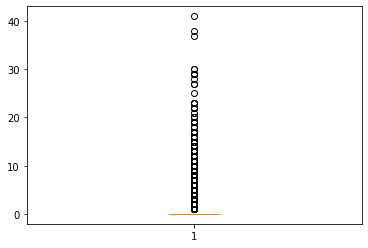

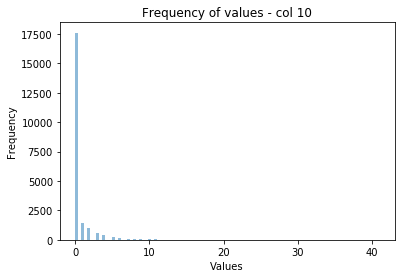

QQ-plot for col values


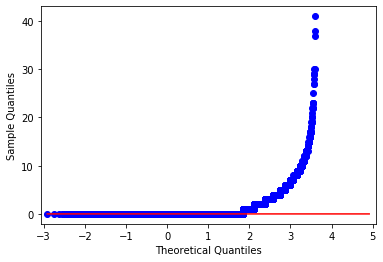

boxplot of col 11


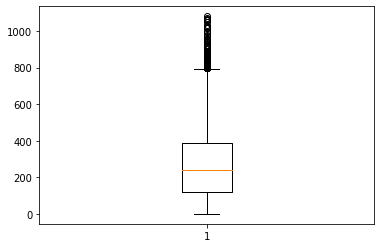

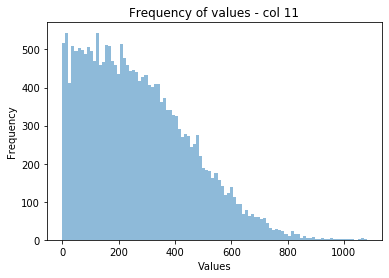

QQ-plot for col values


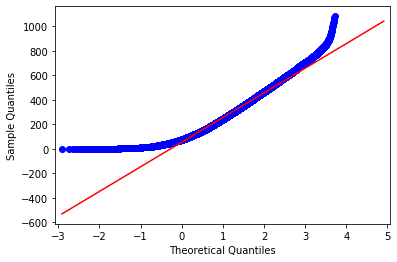

boxplot of col 13


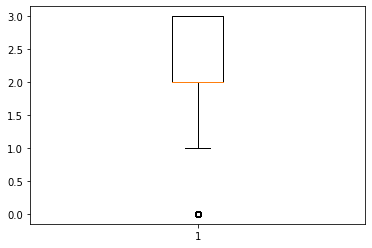

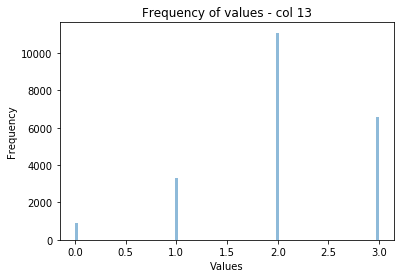

QQ-plot for col values


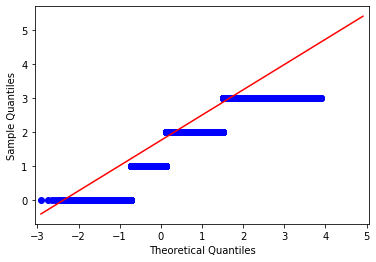

boxplot of col 14


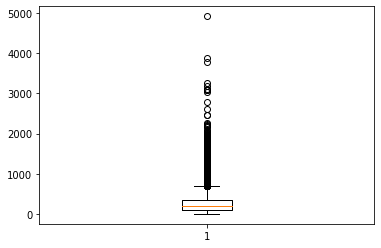

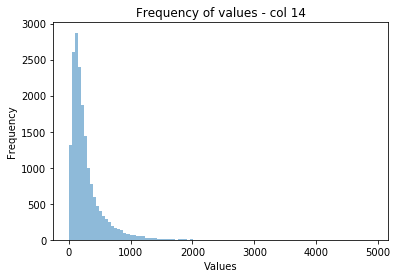

QQ-plot for col values


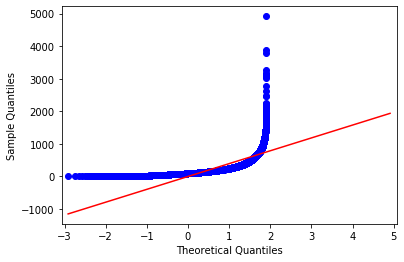

boxplot of col 15


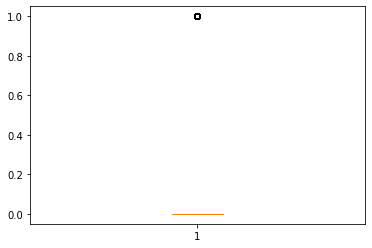

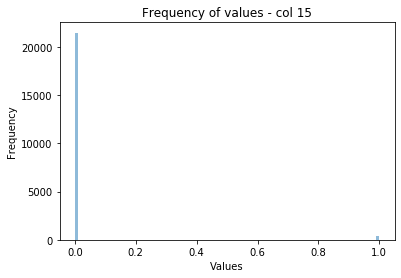

QQ-plot for col values


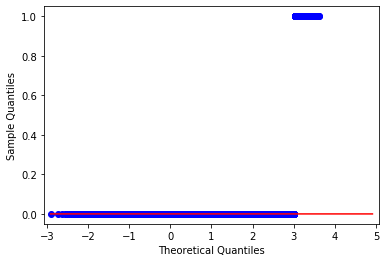

boxplot of col 17


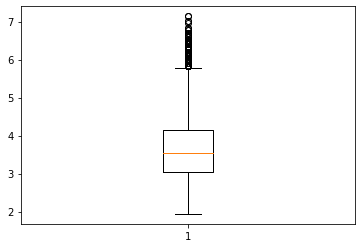

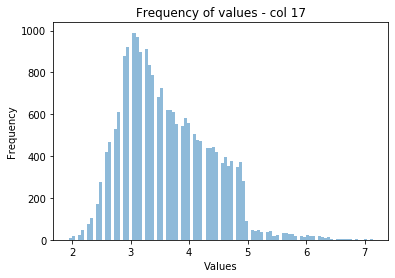

QQ-plot for col values


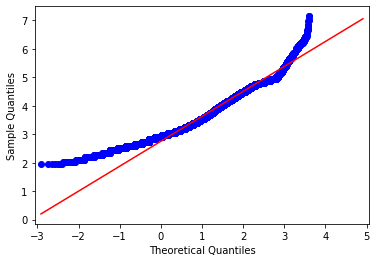

boxplot of col 20


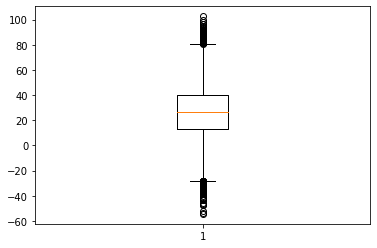

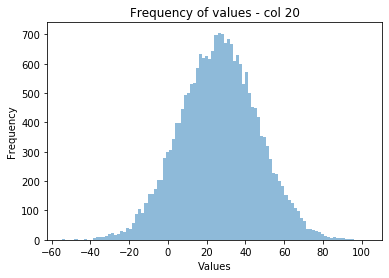

QQ-plot for col values


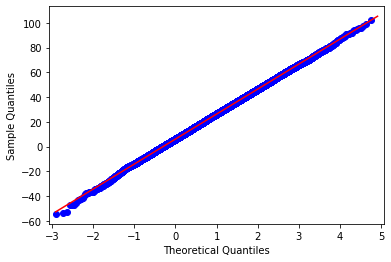

In [141]:
def data__continuous_visualization(data):
    
    new_data = data
    
    for i in new_data.columns[:-1] : 
        #dropping null values and sorting values
        data = new_data[i].dropna().sort_values(ascending = True).to_frame()
                
        if data[i].dtype == object:  #skipping the values that are not numeric!
            continue
        else:
      
            data = data.reset_index(drop = True)
            data = data[i].tolist()
            # plotting boxplot of the data
            print("boxplot of col %s" %i)
            plt.boxplot(data)
            plt.show()
            #plotting histogram of data
            plt.hist(data, bins=100, alpha=0.5)
            
        #plotting the frequency of the values 
        plt.rcParams.update({'font.size': 10, 'figure.figsize': (6, 4)})
        plt.title("Frequency of values - col %s" %i)
        plt.xlabel("Values")
        plt.ylabel("Frequency")
        plt.show()
        
        #QQ plot 
        print("QQ-plot for col values")
        sm.qqplot(new_data[i], loc =1, scale =1, line='q')
        pylab.show()
        
        
data__continuous_visualization(train)  

#  correlation between features 
<a class="anchor" id="cbf"></a>

The features with high correlation are = [['5', '17'], ['7', '9']] 
Heatmap for correlation between featurs


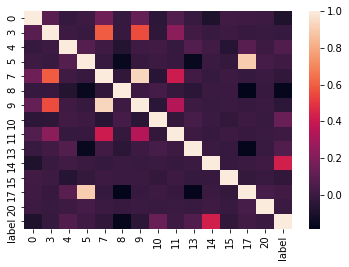

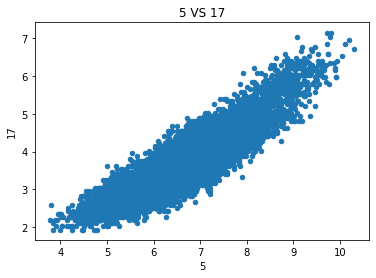

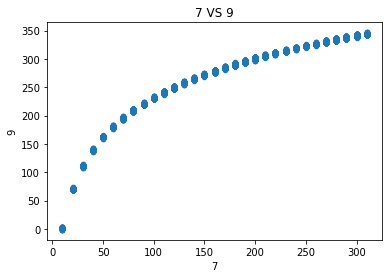

In [142]:
def calc_corr(data , thershold = 0.90):     
    data_corr = data.corr().abs()  ## finding features with correlletion above a  determaind theshold ,defult = 0.85
    best_cor = []
    
    ## Building a matrix with the indices of the featurs with correlation above thershold

    for i in range(data_corr.shape[0]):
        for j in  range(i+1,data_corr.shape[0]):
            
            if data_corr.values[i, j] > thershold :
                best_cor.append([data_corr.columns[i],data_corr.columns[j]])
    
    return best_cor 

indices = calc_corr(train)   
print('The features with high correlation are = {} '.format(indices))
#######

def plot_corr_graf(data, indices):   ## ploting heatmap for data and  grafs for features with correlletion above 
    
    print("Heatmap for correlation between featurs")                              
    sns.heatmap(data.corr(),          
        xticklabels=data.corr().columns,
        yticklabels=data.corr().columns)
    
    for i, j in indices:
        data.plot.scatter(x=i, y=j)
        plt.title("%s VS %s" % (i, j))
        plt.show()

   
plot_corr_graf(train, indices)

# Part B - Preprocessing
<a class="anchor" id="partB"></a>

### missing values and null 

In [143]:
#checking null values in the data 
print("Null values in train data")
print(train.isnull().sum())
print("Null values in test data")
print (test.isnull().sum())   
print(train.dtypes)

Null values in train data
0           73
1           89
2           56
3          105
4           25
5           60
6          145
7           20
8            0
9           39
10         103
11          71
12          13
13          40
14        3985
15          99
16          10
17         101
18          84
19       17681
20           1
label        0
dtype: int64
Null values in test data
0       22
1       36
2       21
3       24
4       11
5       23
6       42
7        4
8        0
9       20
10      29
11      35
12       7
13       7
14    1299
15      37
16       5
17      23
18      21
19    5857
20       0
dtype: int64
0        float64
1         object
2         object
3        float64
4        float64
5        float64
6         object
7        float64
8          int64
9        float64
10       float64
11       float64
12        object
13       float64
14       float64
15       float64
16        object
17       float64
18        object
19        object
20       float64
label

In [144]:
test = pd.read_csv("C:/Data/ML_2021/test_without_target.csv")
train = pd.read_csv("C:/Data/ML_2021/train.csv")
test=test.iloc[:,1:] #the first col in the file is just indexs

In [145]:
#Creating a copy of the dataframes
train_copy = train.copy()
train_copy_x = train_copy.iloc[:,:-1] #data
train_copy_y = train_copy.iloc[:,-1] #labels
test_x = test.copy()

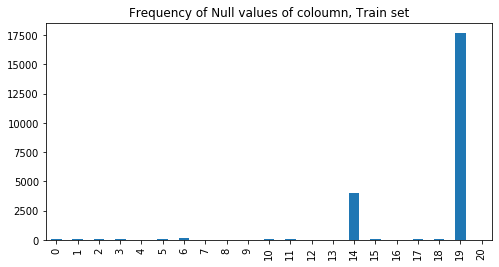

In [146]:
# Drop the '19' column
df = train.isnull().sum()
df= df[:-1]
plt.figure(figsize= (8,4))
plt.title("Frequency of Null values of coloumn, Train set")
df.plot(kind='bar')

train_copy.drop(['19'], axis='columns', inplace=True)
train_copy_x.drop(['19'], axis='columns', inplace=True)
test_x.drop(['19'], axis='columns', inplace=True)

In [147]:
#Removing correlative featuers

train_copy.drop(['9'], axis='columns', inplace=True)
train_copy_x.drop(['9'], axis='columns', inplace=True)
test_x.drop(['9'], axis='columns', inplace=True)


train_copy.drop(['17'], axis='columns', inplace=True)
train_copy_x.drop(['17'], axis='columns', inplace=True)
test_x.drop(['17'], axis='columns', inplace=True)

In [148]:
# Defining functions to handle the missing values

def fill_numeric_null(df):
    df.fillna(df.median(),inplace=True) #We decided to inplace with the median.
    return df

def drop_null_train(df):
    df.dropna(axis=0, inplace=True)
    return df

In [149]:
trainx = fill_numeric_null(train_copy_x)

mask_categorical_nulls = trainx.isna().any(axis=1) #check at least one True in row by DataFrame.isna with boolean indexing
mask_categorical_no_nulls = ~mask_categorical_nulls #NOT operator 

#removing any nulls from the train set
train_x = drop_null_train(trainx)
train_y = train_copy_y[mask_categorical_no_nulls]

#Dealing with the test set:
test_x[['1','2','6','12','16','18']]=test_x[['1','2','6','12','16','18']].fillna(test_x.mode().iloc[0])
test_after_fill_numeric_null=fill_numeric_null(test_x)

train_x = train_x.reset_index(drop=True)
train_y = train_y.reset_index(drop=True)

#checking dataset after removing nulls
pres= round (100*((train.shape[0])-(train_x.shape[0]))/(train.shape[0]), 2)
print ("There were " + str(train.shape[0]) +" records in the inital database")
print ("Now we have " +str(train_x.shape[0]) +" records, which means we dropped " + str (pres) +"% of the data")

There were 21931 records in the inital database
Now we have 21539 records, which means we dropped 1.79% of the data


### Removing Outliers
<a class="anchor" id="ro"></a>

In [150]:
#saving the numeric cols indexs for train and test
numeric_train = train_x.select_dtypes(exclude=['object'])
numeric_test = test_x.select_dtypes(exclude=['object'])

#removing outliers- only for train set
train_x=train_x[(np.abs(stats.zscore(numeric_train)) < 3).all(axis=1)]
train_y = train_y[(np.abs(stats.zscore(numeric_train)) < 3).all(axis=1)]

train_x = train_x.reset_index(drop=True)
train_y = train_y.reset_index(drop=True)

In [151]:
#numeric_train.shape
#numeric_test.shape

In [152]:
train_x.head()

,0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,18,20
0,1.0,a,-1d,0.828866,216.0,4.846091,K,50.0,0,0.0,85.964376,n,2.0,414.0,0.0,S,a8,15.921017
1,8.0,a,-1d,8.981168,46.0,7.324911,A,270.0,0,0.0,294.552881,n,3.0,63.0,0.0,M,a8,47.567140
2,1.0,a,-1d,1.458061,3304.0,7.548887,D,200.0,1,0.0,317.615920,n,1.0,218.0,0.0,M,a4,10.522228
3,1.0,b,-1d,2.753682,212.0,8.200746,E,170.0,0,0.0,181.773337,y,2.0,191.0,0.0,D,a7,21.185050
4,1.0,unknown,-1d,4.496872,1050.0,5.071094,B,260.0,1,0.0,454.058222,n,3.0,293.0,0.0,S,a5,47.491164


### Normalization
<a class="anchor" id="n"></a>

In [153]:
def normalization(train,test):
    model = StandardScaler()
    model.fit(train) # we fit only on train set
    transformed_train = model.transform(train)
    transformed_test=model.transform(test)
    scaled_train = pd.DataFrame(data=transformed_train,columns=train.columns)
    scaled_test = pd.DataFrame(data=transformed_test, columns=test.columns)
    return scaled_train, scaled_test 

numeric_train = train_x.select_dtypes(exclude=['object'])
numeric_test = test_x.select_dtypes(exclude=['object'])

numeric_train,numeric_test=normalization(numeric_train,numeric_test)

In [154]:
numeric_train.head()

,0,3,4,5,7,8,10,11,13,14,15,20
0,-0.756201,-0.902704,-0.523882,-1.908828,-1.284000,-1.103842,-0.393295,-1.002247,-0.085842,0.970855,0.0,-0.525250
1,3.067211,1.305362,-0.622636,0.827345,1.382632,-1.103842,-0.393295,0.164147,1.207078,-0.967010,0.0,1.075123
2,-0.756201,-0.732285,1.269964,1.074575,0.534158,0.905927,-0.393295,0.293112,-1.378761,-0.111258,0.0,-0.798272
3,-0.756201,-0.381364,-0.526206,1.794111,0.170527,-1.103842,-0.393295,-0.466498,-0.085842,-0.260324,0.0,-0.259044
4,-0.756201,0.090782,-0.039404,-1.660466,1.261421,0.905927,-0.393295,1.056076,1.207078,0.302816,0.0,1.071280


### One-hot encoder
<a class="anchor" id="ohe"></a>

In [155]:
categorial_cols_train=pd.get_dummies(train_x.select_dtypes(include=['object']))
categorial_cols_test=pd.get_dummies(test_x.select_dtypes(include=['object']))

#removing from the test the cols that not exist in the train 

for col in categorial_cols_test.columns:
    if col not in categorial_cols_train.columns:
        categorial_cols_test=categorial_cols_test.drop(col, axis = 1)
        
#removing from the train the cols that not exist in the test        
for col in categorial_cols_train.columns:
    if col not in categorial_cols_test.columns:
        categorial_cols_train=categorial_cols_train.drop(col, axis = 1)
        
# Joining all features back together: 
train_x = numeric_train.join(categorial_cols_train, how="inner")
train = train_x.join(train_y, how = "inner")
test_x = numeric_test.join(categorial_cols_test, how="inner")

In [156]:
#test_x.isna().any().sum()
#(train.iloc[:,:-1]).shape
#test_x.shape

In [157]:
test_x.head()

,0,3,4,5,7,8,10,11,13,14,...,18_a11,18_a12,18_a2,18_a3,18_a4,18_a5,18_a6,18_a7,18_a8,18_a9
0,-0.756201,0.060719,-0.646454,0.724141,-1.041579,-1.103842,-0.393295,-0.663148,-1.378761,-0.663356,...,0,0,0,0,0,0,0,1,0,0
1,-0.756201,-0.792638,0.794781,-1.761522,1.625053,0.905927,-0.393295,1.095235,-0.085842,2.732048,...,0,0,0,0,0,1,0,0,0,0
2,-0.756201,-0.215174,-0.530272,0.599253,-1.405210,-1.103842,1.460432,0.051541,-0.085842,-0.260324,...,0,0,0,0,0,1,0,0,0,0
3,-0.756201,-2.047733,0.671047,0.454208,0.291737,0.905927,1.460432,-1.056119,-1.378761,-0.260324,...,1,0,0,0,0,0,0,0,0,0
4,1.974808,-0.759343,0.686732,-0.298238,-0.920368,-1.103842,-0.393295,-1.252441,-0.085842,-0.431475,...,0,0,0,0,0,0,0,0,1,0


# PCA
<a class="anchor" id="pca"></a>

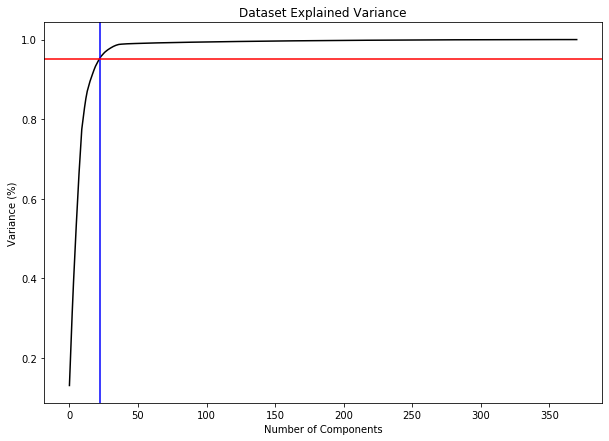

In order to explain 95% of the variance, we need 22.0 components. 


In [158]:
#calculating PCA number of components and showing in graph
pca = PCA().fit(train_x)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='k')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Dataset Explained Variance')
n_comp=round(np.interp(0.95,np.cumsum(pca.explained_variance_ratio_),list(range(0, train_x.shape[1]))))
plt.axvline(n_comp, c='b')
plt.axhline(0.95, c='r')
plt.show();

print('In order to explain 95% of the variance, we need '+str(n_comp)+' components. ')

In [159]:
def PCA_function(X,test_set):
    pca = PCA(0.95)
    pca.fit(X)
    x_new = pca.transform(X)
    reduced_test_set=pca.transform(test_set)
    final_components = pca.components_
    return x_new ,reduced_test_set ,final_components

pca_data ,reduced_test_set, components = PCA_function(train.iloc[:,:-1].values ,test_x)

train_pca = pd.DataFrame(data=pca_data).join(train_y, how="inner")
test_pca = pd.DataFrame(data=reduced_test_set)

#print(train_pca.shape)
#print(test_pca.shape)
train_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,label
0,-1.825133,-1.098600,0.383948,-1.081728,-1.435808,0.281857,-1.136456,0.297118,1.168914,-1.101390,...,0.104052,0.175524,0.038220,-0.175896,0.277209,-0.226531,-0.016275,-0.413255,0.487125,1
1,2.424912,1.376041,0.576763,-2.317294,1.745991,-1.021276,0.307505,1.386155,-0.850513,-0.180791,...,-0.274547,0.312063,-0.053517,-0.273989,0.475187,-0.195343,-0.095670,-0.188013,0.056160,0
2,-0.122719,1.082214,-0.702802,1.528481,-0.427228,1.109553,0.781689,-0.767452,0.274996,0.512277,...,-0.370113,-0.045428,0.596670,-0.011178,0.056468,-0.258225,0.031235,0.002040,-0.117575,0
3,-0.331251,1.719765,0.114268,-0.153241,-0.108796,0.256479,-1.278362,-0.743055,-0.905630,0.114326,...,-0.241601,-0.175391,-0.245854,0.659552,-0.348896,0.650858,-0.080630,0.078232,0.915963,0
4,1.279792,-2.293293,-0.262904,-0.310068,-0.889690,-1.206272,0.529850,-0.727438,0.344417,0.637573,...,0.849063,0.106853,0.274610,-0.054937,-0.083841,0.269071,-0.097887,0.029987,0.005355,0


# Part C -Models
<a class="anchor" id="partC"></a>

In [160]:
# Getting the train data without the lable, and only with the lable:
train_x_after_preprocessing = train_pca.iloc[:,:-1]
train_y_after_preprocessing = train_pca.iloc[:,-1]

## KNN
<a class="anchor" id="knn"></a>

In [161]:
knn_clf = KNeighborsClassifier()

KNN_para = {'n_neighbors': [5,10],#Number of neighbors
            'metric' : ['euclidean','manhattan'], 
            'algorithm' : ["auto",'brute'], 
            #Algorithm used to compute the nearest neighbors:
            #‘brute’ will use a brute-force search.
            #‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.
            'weights': ['uniform','distance']}
            #weight function used in prediction.
            #‘distance’ : weight points by the inverse of their distance.
            #‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

kfold= KFold(n_splits = 5, random_state= None, shuffle = False)

#Provides train/test indices to split data in train/test sets.
#Split dataset into k consecutive folds (without shuffling by default).
#Each fold is then used once as a validation while the k - 1 remaining folds form the training set.


knnGS  = GridSearchCV(KNeighborsClassifier(), KNN_para, cv=kfold, scoring='roc_auc')
#Exhaustive search over specified parameter values for an estimator.

knnGS.fit(train_x_after_preprocessing,train_y_after_preprocessing)


print ('K-neighbors chosen parameters (recieved best AUC): {}'.format(knnGS.best_params_))
print ("K-neighbors AUC score with the chosen parameters: ", knnGS.best_score_)

# implementing the best parameters to model.
knn_clf = KNeighborsClassifier(**knnGS.best_params_)

K-neighbors chosen parameters (recieved best AUC): {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
K-neighbors AUC score with the chosen parameters:  0.8167598239597336


## Logistic Regression
<a class="anchor" id="lr"></a>

In [162]:
lr_parameters = {'penalty':['l1', 'l2'], #l1 stands for abs distance, l2 stands for quad_distances
                 'C': [0.01, 0.1, 0.5, 1, 10, 100, 1000], # Inverse regularization parameter, larger C means less regularization.
                 'tol':[0.01, 0.001],# Stopping critiria
                 'max_iter': [100], # For some optimization algorithms, the algorithm solves it with iterations.
                 'random_state' :[0,42], #Used when solver == ‘liblinear’ to shuffle the data, set a seed. 
                 'solver' : ["liblinear"]} # Algorithm to use in the optimization problem


kfold = KFold(n_splits = 5, random_state = None)

lrGS = GridSearchCV(LogisticRegression(), lr_parameters, cv = kfold, scoring='roc_auc')

lrGS.fit(train_x_after_preprocessing,train_y_after_preprocessing)

print ('Logistic Regression chosen parameters (recieved best AUC): {}'.format(lrGS.best_params_))
print ("Logistic Regression AUC score with the chosen parameters: ", lrGS.best_score_)

# Loading the best hyper parameters to the model
lr_clf = LogisticRegression(**lrGS.best_params_)

Logistic Regression chosen parameters (recieved best AUC): {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear', 'tol': 0.001}
Logistic Regression AUC score with the chosen parameters:  0.846858531190185


## ANN
<a class="anchor" id="ann"></a>

In [163]:
# We tried another parametrs in the ANN model but it took more than hour.
# We decided to keep it basic.

ann_parameters = {'activation' : ["logistic", "relu"], 
                      'hidden_layer_sizes' : [(100),(50,50),(20,20,20 ,10,10)], 
                      'batch_size' : [10,50],
                     # 'alpha' : [0.1],
                     # 'tol' : [1e-4] ,
                     #'learning_rate': ["adaptive",'invscaling'],
                     #'power_t' : [0.5],
                      'learning_rate_init' : [0.1], #In some of the runs we saw that the network got stuck on a local min, for this reason we enlearge the defualt momentum
                      'max_iter' : [1000],
                      'random_state' :[23]
                    # 'solver' : ['sgd','lbfgs']
                    }

kfold= KFold(n_splits = 5 , random_state = None)
annGS = GridSearchCV(MLPClassifier(), ann_parameters, cv=kfold, scoring='roc_auc')
annGS.fit(train_x_after_preprocessing,train_y_after_preprocessing)

print ('Neural Network chosen parameters (recieved best AUC): {}'.format(annGS.best_params_))
print ("Neural Network AUC score with the chosen parameters: ", annGS.best_score_)

#implamenting the best parameters to model
ann_clf = MLPClassifier(**annGS.best_params_)

Neural Network chosen parameters (recieved best AUC): {'activation': 'logistic', 'batch_size': 50, 'hidden_layer_sizes': 100, 'learning_rate_init': 0.1, 'max_iter': 1000, 'random_state': 23}
Neural Network AUC score with the chosen parameters:  0.8704790958088235


## Random Forest
<a class="anchor" id="rf"></a>

In [164]:
rf_parameters = { 
    'n_estimators': [10, 50], # The number of trees in the forest.
    'max_features': ['auto', 'log2'], # The number of features to consider when looking for the best split
    'criterion' :['gini', 'entropy'],
    'max_depth': [None,5,10], #The maximum depth of the tree. 
    #If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    'warm_start': [False],
    #When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble,
    #otherwise, just fit a whole new forest
    'random_state':[42],#seed
    'min_samples_leaf': [1,3], #The minimum number of samples required to be at a leaf node
    'bootstrap': [True] #Whether bootstrap samples are used when building trees' 
    }

kfold= KFold(n_splits = 5 , random_state = None)
rfGS  = GridSearchCV(RandomForestClassifier(),  rf_parameters, cv=kfold , scoring='roc_auc')
rfGS.fit(train_x_after_preprocessing,train_y_after_preprocessing)

print ('Random Forest chosen parameters (recieved best AUC): {}'.format(rfGS.best_params_))
print ("Random Forest AUC score with the chosen parameters: ", rfGS.best_score_)

# implementing the best parameters to model
rf_clf = RandomForestClassifier(**rfGS.best_params_)

Random Forest chosen parameters (recieved best AUC): {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 50, 'random_state': 42, 'warm_start': False}
Random Forest AUC score with the chosen parameters:  0.8560271579400324


# Part D- Evaluation
<a class="anchor" id="partD"></a>

## Confusion Matrix for Logistic Regression
<a class="anchor" id="cm"></a>

In [165]:
lr_clf.fit(train_x_after_preprocessing,train_y_after_preprocessing) #Logistic regression fit
Y_prediction = lr_clf.predict(train_x_after_preprocessing) #The usual, for each row in X_train will predict the class
cm = confusion_matrix(train_y_after_preprocessing ,Y_prediction) #Creating the Confusion matrix
tn,fp,fn,tp = cm.ravel()
#Creating Confusion matrix as a Data Frame 
con_mat = pd.DataFrame(columns = ['','Actual Positive','Actual Negative'])
con_mat.loc[' '] = ['Predicted Positive',tp,fp]
con_mat.loc[''] = ['Predicted Negative',fn,tn]
print ("Confusion Matrix for Logistic Regression")
display(con_mat)

Confusion Matrix for Logistic Regression


,,Actual Positive,Actual Negative
,Predicted Positive,899,555
,Predicted Negative,2278,15562


## ROC curve
<a class="anchor" id="roc"></a>

In [166]:
def KfoldPlot(X, y, clf, k):
    # clf is the input model, ant then we'll get the parametres from it
    model = clf
    folds = KFold(n_splits=k)
    
    # Getting the parameters of the cunfusion matrix to the function:
    ctp_rate = 0.0
    ctp_rate_train = 0.0
    
    avg_fp_rate = np.arange(0,1,0.01)
    range_graph = np.linspace(0,1,100)
    splitted = folds.split(X)
    
    #From each split of the K-fold we are itrating over the combination of the train and validation 
    for i_train, i_validation in splitted:
        
        train_X = X.iloc[i_train]
        validation_X = X.iloc[i_validation]
        train_y = y.iloc[i_train]
        validation_y =  y.iloc[i_validation]
        
        # fitting to the model
        model.fit(train_X, train_y)
        
        # For both train & validation sets we are calculating the Prediction the probabilities
        predicted_prob = model.predict_proba(validation_X)[:, 1]
        predicted_prob_train = model.predict_proba(train_X)[:,1]
        
        #Plutting the ROC curve
        
        ROC_calc = roc_curve(validation_y, predicted_prob)
        fp_rate = ROC_calc[0]
        tp_rate = ROC_calc[1]
        thresholds = ROC_calc[2]
        
        ROC_calc_train = roc_curve(train_y, predicted_prob_train)
        fp_rate_train = ROC_calc_train[0]
        tp_rate_train = ROC_calc_train[1]
        thresholds_train = ROC_calc_train[2]
        
        ctp_rate += np.interp(avg_fp_rate, fp_rate, tp_rate)
        ctp_rate[0] = 0.0
        
        ctp_rate_train += np.interp(avg_fp_rate, fp_rate_train, tp_rate_train)
        ctp_rate_train[0] = 0.0

        
        plt.plot(fp_rate, tp_rate, color='pink')   
    
    avg_tp_rate = ctp_rate/float(k)
    avg_tp_rate[-1] = 1.0
    
    avg_tp_rate_train = ctp_rate_train/float(k)
    avg_tp_rate_train[-1] = 1.0
    
    auc_result = auc(range_graph, avg_tp_rate) 
    auc_result_train = auc(range_graph, avg_tp_rate_train)
        
    plt.plot([0, 1], [0, 1], color='r', linestyle='--', label = 'Random-Guess Line')
    
    plt.plot(avg_fp_rate, avg_tp_rate, color='k', linestyle='-', label='AUC is '+str(auc_result)[:6])


    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for ' + str(clf)[:str(clf).index('(')] + ' Model')
    plt.legend()
    plt.show()
    
    #print (clf,auc_result,auc_result_train)

    return clf,auc_result,auc_result_train

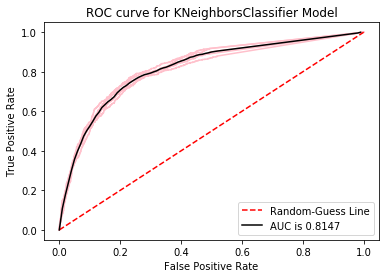

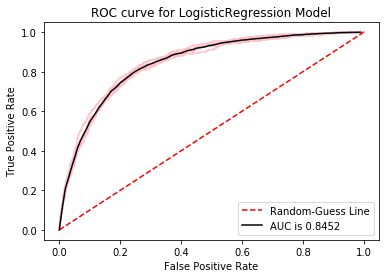

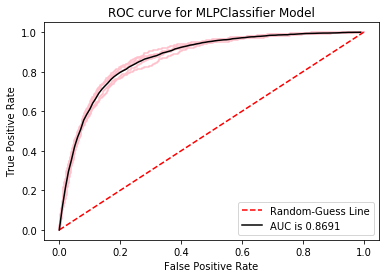

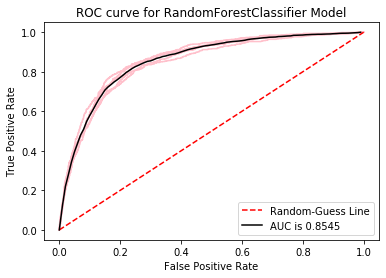

In [167]:
clf_lst = [knn_clf,lr_clf,ann_clf,rf_clf]
Results = []
for model in clf_lst:
    Results.append(KfoldPlot(train_x_after_preprocessing,train_y_after_preprocessing, model, 5))

In [168]:
for result in Results:
    print (str(result)+"\n")

(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance'), 0.8147906837896872, 0.994949494949495)

(LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.001, verbose=0,
                   warm_start=False), 0.8452165885221861, 0.8468915676696595)

(MLPClassifier(activation='logistic', alpha=0.0001, batch_size=50, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=23, shuffl

## OverFitting
<a class="anchor" id="of"></a>

In [169]:
overfit_df = pd.DataFrame(columns=['Classifier','Train AUC rate', 'Validation AUC rate'])
overfit_df.style

for i in Results:
    df = pd.DataFrame([[str(i[0]).split('(')[0], i[2], i[1]]],columns=['Classifier','Train AUC rate', 'Validation AUC rate'])
    overfit_df=overfit_df.append(df,ignore_index=True)
    
overfit_df["Difference"] = overfit_df["Train AUC rate"] - overfit_df["Validation AUC rate"]
overfit_df['Overfitting'] = overfit_df['Difference'] > 0.05

overfit_df

,Classifier,Train AUC rate,Validation AUC rate,Difference,Overfitting
0,KNeighborsClassifier,0.994949,0.814791,0.180159,True
1,LogisticRegression,0.846892,0.845217,0.001675,False
2,MLPClassifier,0.896416,0.869109,0.027307,False
3,RandomForestClassifier,0.994880,0.854538,0.140342,True


# Part E- Prediction
Exporting to CSV File
<a class="anchor" id="partE"></a>

In [170]:
# We got that LR is the best model- The prediction Y_pred will be calculated by this model
lr_clf.fit(train_x_after_preprocessing, train_y_after_preprocessing)
Y_pred = pd.DataFrame(lr_clf.predict_proba(test_pca))
Y_pred = pd.DataFrame(Y_pred[1])
Y_pred = Y_pred.rename(columns = {1 : "pred_proba"})
Y_pred.to_csv('Submission_group_8.csv')

In [171]:
end_time = datetime.datetime.now()
print('Total running time for this project: '+ str(end_time - start_time))

Total running time for this project: 0:25:55.272879
